FIND TEXT HEIGHT BY NEW METHOD

In [8]:
import cv2

img_file_path = '../book/results2/2.jpg'
img = cv2.imread(img_file_path)
heights = []
gray_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
_, thresh_img = cv2.threshold(gray_img.copy(), 200, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 1))
erode_img = cv2.erode(thresh_img.copy(), kernel=kernel, iterations=3)
height, width = erode_img.shape[:2]
new_erode_img = erode_img[0:height, 0:width]         # int(0.1 * width):int(0.9 * width)
new_height, new_width = new_erode_img.shape[:2]
above_point = below_point = None
for i1 in range(new_height):
    for j1 in range(int(new_width/2)):
        if 255 not in new_erode_img[i1, j1:j1+int(new_width/2)+1]:
            above_point = i1
            break
    if above_point is not None:
        break
for i2 in range(new_height):
    for j2 in range(int(new_width/2)):
        if 255 not in new_erode_img[-i2-1, j2:j2+int(new_width/2)+1]:
            below_point = new_height - i2 -1
            break
    if below_point is not None:
        break
min_character_height = below_point - above_point 
print(below_point, above_point, new_height)
print(min_character_height)
new_erode_img = cv2.cvtColor(new_erode_img, cv2.COLOR_GRAY2BGR)
cv2.line(new_erode_img, (int(new_width/2), above_point), (int(new_width/2), below_point), (0,0,255), 2)
cv2.imshow('erode', new_erode_img)
cv2.imshow('orig', img)
cv2.waitKey()


51 17 74
34


KeyboardInterrupt: 

FIND TEXT HEIGHT BY OLD METHOD

In [1]:
import cv2
import numpy as np

img_file_path = '../book/results2/98.jpg'
img = cv2.imread(img_file_path)
heights = []
gray_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
_, thresh_img = cv2.threshold(gray_img.copy(), 200, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
erode_img = cv2.erode(thresh_img.copy(), kernel=kernel, iterations=3)
height, width = erode_img.shape[:2]
text_heights = []
for i in range(width):
    start_point = end_point = None
    vertical_line = erode_img[:, i]
    for j in range(1, height):
        if vertical_line[j-1] == 255 and vertical_line[j] == 0:
            start_point = j
        elif vertical_line[j-1] == 0 and vertical_line[j] == 0 and j-1 == 0:
            start_point = 0
        if vertical_line[j-1] == 0 and vertical_line[j+1] == 255:
            end_point = j-1
        elif vertical_line[j-1] ==0 and vertical_line[j] == 0 and j == height-1:
            end_point = j
        if end_point is not None and start_point is not None and end_point > start_point:
            text_heights.append(end_point - start_point)
            
median_height = np.median(np.array(sorted(text_heights)))
print(median_height)
cv2.imshow('erode', erode_img)
cv2.waitKey()

18.0


-1

In [7]:
bins = [5*f for f in range(8)]
print(bins)

[0, 5, 10, 15, 20, 25, 30, 35]


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

with open('../data4.json') as jsonfile:
    data = json.load(jsonfile)
    paragr_heights = []
    paragr_thicknesses = []
    paragr_x_begin = []
    for id in data.keys():
        paragr_heights.append(data[id]['height'])
        paragr_thicknesses.append(data[id]['thickness'])
        paragr_x_begin.append(data[id]['x_begin'])
print(set(paragr_heights).__len__())
plt.hist(paragr_heights, bins=max(paragr_heights))
plt.xlabel('Height')
plt.ylabel("Amount")
plt.grid(True)
plt.show()
peaks, probs = find_peaks(paragr_heights, height=(0,20))


UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 89: character maps to <undefined>

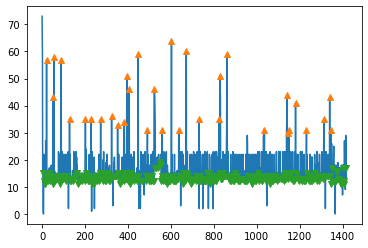

{'peak_heights': array([57., 43., 58., 57., 35., 35., 35., 35., 36., 33., 34., 51., 46.,
       59., 31., 46., 31., 64., 31., 60., 35., 35., 51., 59., 31., 44.,
       30., 31., 41., 31., 35., 43., 31.])}
[  21   52   55   89  128  202  228  273  324  352  381  395  406  448
  491  523  559  603  637  672  731  825  828  861 1036 1142 1146 1150
 1181 1232 1313 1340 1345]


In [6]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import json
import numpy as np

with open('../data4.json') as jsonfile:
    data = json.load(jsonfile)
    paragr_heights = []
    for id in data.keys():
        paragr_heights.append(data[id]['height'])
        
# with open('../data6.json', 'r', encoding='utf-8') as f:
#     data1 = json.load(f)
#     paragraphs = []
#     for id in data1.keys():
#         paragraphs.append(data1[id]["paragraph"])
paragr_heights = np.array(paragr_heights)
peaks, peak_probs = find_peaks(paragr_heights, height=30)
troughs, tr_probs = find_peaks(-paragr_heights, (-20,-10))
plt.plot(paragr_heights)
plt.plot(peaks, paragr_heights[peaks], '^')
plt.plot(troughs, paragr_heights[troughs], 'v')
plt.show()
print(peak_probs)
print(peaks)


[ 2 15 22 31]


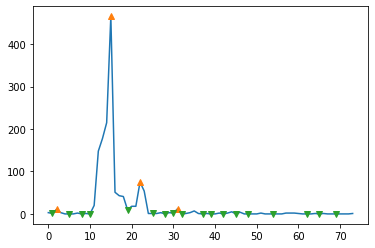

In [7]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import json
import numpy as np

with open('../data4.json') as jsonfile:
    data = json.load(jsonfile)
    paragr_heights = []
    for id in data.keys():
        paragr_heights.append(data[id]['height'])
new_paragr_heights = list(set(paragr_heights))
new_height_amount = []
for height in new_paragr_heights:
    new_height_amount.append(paragr_heights.count(height))
max_height = max(new_paragr_heights)    
compare_height = [f for f in range(max_height+1)]
final_amount = []
for ch in compare_height:
    if ch in new_paragr_heights:
        id = new_paragr_heights.index(ch)
        final_amount.append(new_height_amount[id])
    else:
        final_amount.append(0)
final_amount = np.array(final_amount)
peaks, peak_probs = find_peaks(final_amount, height=10)
troughs, tr_probs = find_peaks(-final_amount)
plt.plot(final_amount)
plt.plot(peaks, final_amount[peaks], '^')
plt.plot(troughs, final_amount[troughs], 'v')
print(peaks)
plt.show()



[1, 2, 3, 43, 0]
